# Proyek Analisis Data: Bike Sharing Analysis

- Nama: Naufal Hadi Darmawan
- Email: hadinaufal06@gmail.com
- id Dicoding: naufalhd12

## Menentukan Pertanyaan Bisnis
- Bagaimana tren permintaan sepeda setiap bulannya?
- Musim apa yang paling banyak menyewakan sepeda?
- Apakah ada perbedaan pola permintaan sepeda antara pengguna terdaftar dan pengguna kasual?
- Apakah ada perbedaan pola permintaan sepeda pada saat holiday, weekend, dan workingday?
- Bagaimana korelasi antara total rental sepeda dengan variabel temp, atemp, hum, dan windspeed? 

## Background Data
This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the Capital bike share system with the corresponding weather and seasonal information.

In [1]:
# Menyiapkan Semua library yang ingin digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Assesing Data

### day_df

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kesalahan tipe data pada column dteday yang seharusnya datetime

In [4]:
# pemeriksaan missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# pemeriksaan duplikasi
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Terdapat kesalahan tipe data pada column dteday yang seharusnya datetime

## Cleaning Data

In [7]:
# mengubah tipe data pada column dteday
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis

### Pertanyaan Bisnis
- Bagaimana tren permintaan sepeda setiap bulannya?
- Musim apa yang paling banyak menyewakan sepeda?
- Apakah ada perbedaan pola permintaan sepeda antara pengguna terdaftar dan pengguna kasual?
- Apakah ada perbedaan pola permintaan sepeda pada saat holiday, weekend, dan workingday?
- Bagaimana korelasi antara total rental sepeda dengan variabel temp, atemp, hum, dan windspeed? 

In [9]:
# total rental bike per month
cnt_per_month_df = day_df.resample(rule="M", on="dteday").agg(
    {
        "cnt": "sum"
    }
)

cnt_per_month_df.index = cnt_per_month_df.index.strftime("%B")
cnt_per_month_df = cnt_per_month_df.reset_index()

cnt_per_month_df.rename(
    columns={
        "dteday": "month",
        "cnt": "total_rent"
    }, inplace=True
)
cnt_per_month_df

C:\Users\hadin\AppData\Local\Temp\ipykernel_24364\354501708.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cnt_per_month_df = day_df.resample(rule="M", on="dteday").agg(


,month,total_rent
0,January,38189
1,February,48215
2,March,64045
3,April,94870
4,May,135821
5,June,143512
6,July,141341
7,August,136691
8,September,127418
9,October,123511


In [10]:
# total rental bike per month
cnt_per_month_df = day_df.resample(rule="M", on="dteday").agg(
    {
        "cnt": "sum"
    }
)

# Menambahkan kolom tahun
cnt_per_month_df['tahun'] = cnt_per_month_df.index.year

# Mengelompokkan berdasarkan tahun dan bulan
grouped_df = cnt_per_month_df.groupby(['tahun', cnt_per_month_df.index.strftime("%B")]).agg(
    {
        "cnt": "sum"
    }
)

grouped_df.reset_index(inplace=True)

grouped_df.rename(
    columns={
        "dteday": "month",
        "cnt": "total_rent"
    }, inplace=True
)

# Sorting DataFrame by month
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

grouped_df['month'] = pd.Categorical(grouped_df['month'], categories=month_order, ordered=True)
grouped_df = grouped_df.sort_values(['tahun', 'month'])

print(grouped_df)

    tahun      month  total_rent
4    2011    January       38189
3    2011   February       48215
7    2011      March       64045
0    2011      April       94870
8    2011        May      135821
6    2011       June      143512
5    2011       July      141341
1    2011     August      136691
11   2011  September      127418
10   2011    October      123511
9    2011   November      102167
2    2011   December       87323
16   2012    January       96744
15   2012   February      103137
19   2012      March      164875
12   2012      April      174224
20   2012        May      195865
18   2012       June      202830
17   2012       July      203607
13   2012     August      214503
23   2012  September      218573
22   2012    October      198841
21   2012   November      152664
14   2012   December      123713


C:\Users\hadin\AppData\Local\Temp\ipykernel_24364\2319363550.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cnt_per_month_df = day_df.resample(rule="M", on="dteday").agg(


In [11]:
# rental bikes by season
season_df = day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()
season_df.rename(
    columns={
        "cnt": "total_rent"
    }, inplace=True
)

# Mapping nilai season ke string yang diinginkan
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Mengganti nilai season dengan string yang sesuai
season_df['season'] = season_df['season'].replace(season_mapping)


season_df

,season,total_rent
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Pada tabel diatas menunjukkan bahwa sepeda paling banyak disewa pada musim gugur

In [12]:
# casual vs registered transaction
total_casual = day_df["casual"].sum()
total_registered = day_df["registered"].sum()

casual_vs_registered_df = pd.DataFrame({
    "casual":[total_casual],
    "registered": [total_registered]
})

casual_vs_registered_df

,casual,registered
0,620017,2672662


Terdapat perbedaan yang terlampau jauh antara transaksi casual dan registered.

In [13]:
# holiday vs workingday
holiday_vs_workingday = day_df.groupby(["holiday", "workingday"]).agg(
    {
        "cnt": "sum"
    }
).reset_index()

holiday_vs_workingday.rename(
    columns={
        "cnt": "total_rent"
    }, inplace=True
)

holiday_vs_workingday

,holiday,workingday,total_rent
0,0,0,921834
1,0,1,2292410
2,1,0,78435


In [14]:
day_df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


In [15]:
cnt_corr = day_df.loc[:, ["cnt", "temp", "atemp", "hum", "windspeed"]]
cnt_corr.corr(method="pearson")


,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627494,0.631066,-0.100659,-0.234545
temp,0.627494,1.000000,0.991702,0.126963,-0.157944
atemp,0.631066,0.991702,1.000000,0.139988,-0.183643
hum,-0.100659,0.126963,0.139988,1.000000,-0.248489
windspeed,-0.234545,-0.157944,-0.183643,-0.248489,1.000000


Kolom cnt memiliki korelasi positif kuat dengan kolom temp dan atemp, yang yang berarti semakin tinggi nilai suhu, semakin banyak sepeda yang disewa. Kolom cnt memiliki korelasi negatif lemah dengan kolom hum dan windspeed, yang berarti tidak terlalu mempengaruhi penyewaan sepeda.

## Visualization & Explanatory Analysis

### Bagaimana tren permintaan sepeda setiap bulannya?

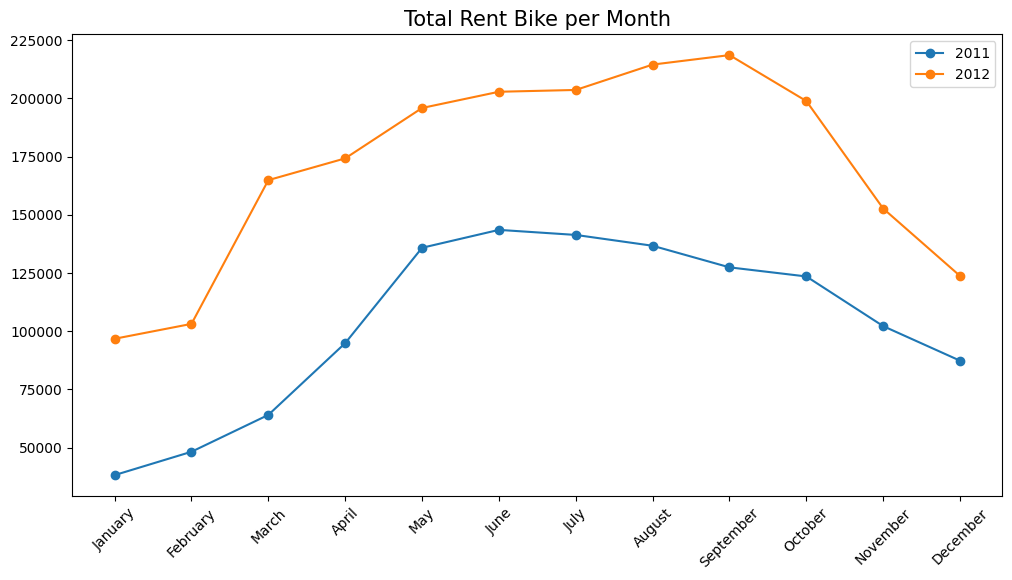

In [16]:
plt.figure(figsize=(12, 6))

for year in grouped_df['tahun'].unique():
    year_data = grouped_df[grouped_df['tahun'] == year]
    plt.plot(year_data['month'], year_data['total_rent'], label=str(year), marker="o")

# Menambahkan judul dan label
plt.title('Total Rent Bike per Month', loc="center", fontsize=15)

# Menambahkan legenda
plt.legend()

plt.xticks(rotation=45)
# Menampilkan grafik
plt.show()


### Pada musim apa yang paling banyak terjadi transaksi penyewaan sepeda?

C:\Users\hadin\AppData\Local\Temp\ipykernel_24364\421495349.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 0, '')

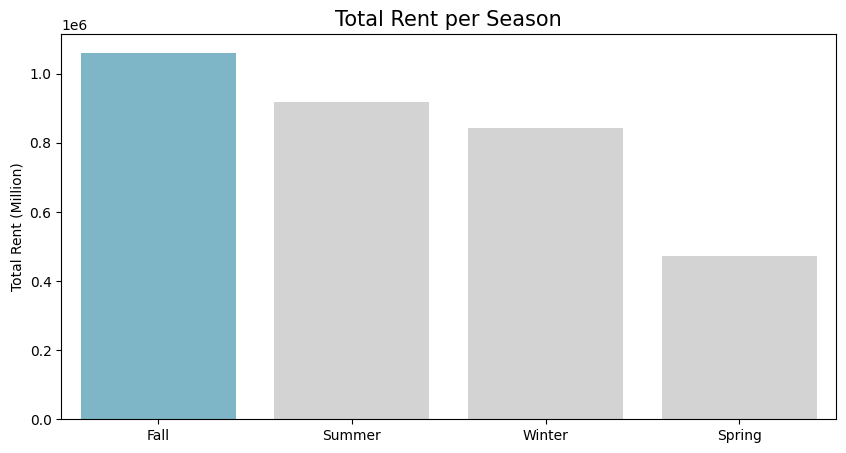

In [17]:
plt.figure(figsize=(10,5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="season",
    y="total_rent",
    data=season_df,
    palette=colors
)
plt.title("Total Rent per Season", loc="center", fontsize=15)
plt.ylabel("Total Rent (Million)")
plt.xlabel(None)

### Apakah ada perbedaan pola permintaan sepeda antara pengguna terdaftar dan pengguna kasual?

<Figure size 1000x500 with 0 Axes>

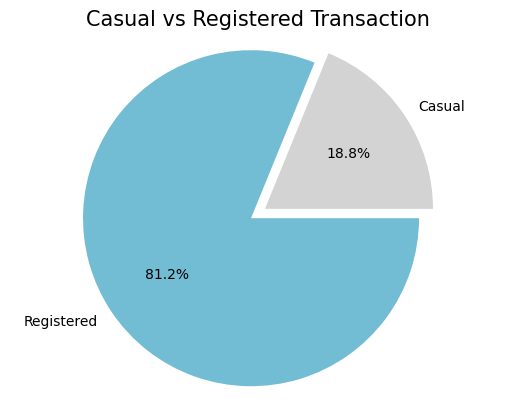

In [18]:
plt.figure(figsize=(10,5))

data = {
    "Casual": total_casual,
    "Registered": total_registered
}
explode = (0.1, 0)
colors = ["#D3D3D3", "#72BCD4"]
# membuat pie chart
fig, ax = plt.subplots()
ax.pie(data.values(), labels=data.keys(), autopct='%1.1f%%', explode=explode, colors=colors)
ax.axis('equal') 
plt.title("Casual vs Registered Transaction", loc="center", fontsize=15)
plt.show()

### Apakah ada perbedaan pola permintaan sepeda pada saat holiday, weekend, dan workingday?

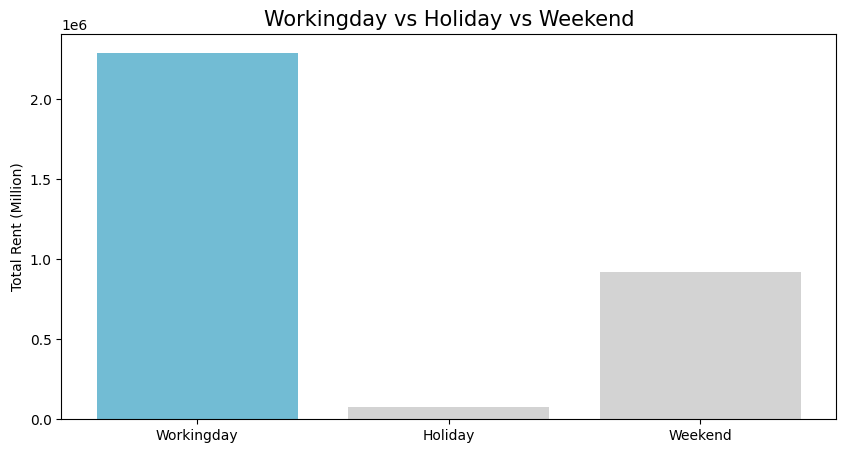

In [19]:
plt.figure(figsize=(10,5))
labels = ['Workingday', 'Holiday', "Weekend"]
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]
# Menghitung total sewa sepeda untuk setiap kategori
workingday_rent = holiday_vs_workingday[(holiday_vs_workingday['holiday'] == 0) & (holiday_vs_workingday['workingday'] == 1)]['total_rent'].sum()
holiday_rent = holiday_vs_workingday[(holiday_vs_workingday['holiday'] == 1) & (holiday_vs_workingday['workingday'] == 0)]['total_rent'].sum()
weekend_rent = holiday_vs_workingday[(holiday_vs_workingday['holiday'] == 0) & (holiday_vs_workingday['workingday'] == 0)]['total_rent'].sum()
# data diubah menjadi diagram batang

plt.title("Workingday vs Holiday vs Weekend", loc="center", fontsize=15)
plt.ylabel("Total Rent (Million)")
plt.bar(labels, [workingday_rent, holiday_rent, weekend_rent], color=colors)
plt.show()


### Bagaimana korelasi antara total rental sepeda dengan variabel temp, atemp, hum, dan windspeed? 

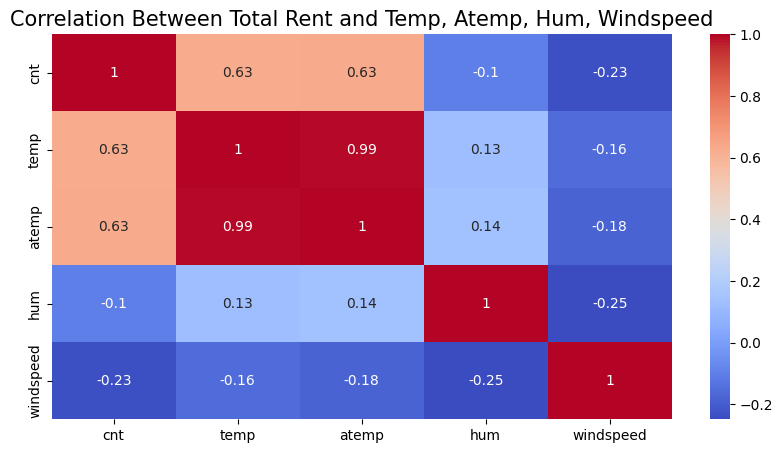

In [20]:
plt.figure(figsize=(10,5))
# Membuat tabel korelasi dari dataframe cnt_corr
corr = cnt_corr.corr(method="pearson")
# Membuat plot heatmap 
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title("Correlation Between Total Rent and Temp, Atemp, Hum, Windspeed", loc="center", fontsize=15)
plt.show()


### Conclusion

#### Bagaimana tren permintaan sepeda setiap bulannya?
Pada diagram di atas menunjukkan tren penyewaan sepeda per bulan pada tahun 2011 dan 2012. Pada tahun 2011 paling banyak terjadi transaksi pada bulan Juni, sedangkan pada tahun 2012 paling banyak terjadi transaksi pada September. Pada kedua tahun tersebut bulan Januari menjadi yang paling sedikit menyewakan sepeda.

#### Pada musim apa yang paling banyak terjadi transaksi penyewaan sepeda?
Pada diagram di atas, kita bisa melihat bahwa musim gugur adalah musim yang paling diminati oleh orang-orang untuk menyewa sepeda, mungkin karena cuaca yang sejuk dan pemandangan yang indah. Sedangkan musim semi adalah musim yang paling kurang diminati, mungkin karena cuaca yang dingin dan basah. Musim panas dan musim dingin memiliki jumlah penyewaan yang hampir sama, mungkin karena orang-orang memiliki preferensi yang berbeda-beda terhadap cuaca yang panas atau dingin.

#### Apakah ada perbedaan pola permintaan sepeda antara pengguna terdaftar dan pengguna kasual?
Pada pie chart di atas, kita bisa melihat bahwa sebagian besar orang yang menyewa sepeda adalah orang yang sudah terdaftar sebagai pelanggan, yang mungkin menunjukkan bahwa mereka adalah pengguna sepeda yang rutin atau loyal. Sedangkan orang yang menyewa sepeda secara kasual adalah orang yang mungkin hanya mencoba sepeda sekali-sekali atau untuk tujuan tertentu.

#### Apakah ada perbedaan pola permintaan sepeda pada saat holiday, weekend, dan workingday?
Dari diagram di atas, kita bisa melihat bahwa jumlah penyewaan sepeda yang dilakukan pada hari kerja jauh lebih banyak daripada hari libur atau akhir pekan. Ini mungkin menunjukkan bahwa sebagian besar orang menggunakan sepeda untuk berangkat dan pulang kerja, atau untuk keperluan lain yang berkaitan dengan pekerjaan. Sedangkan pada hari libur atau akhir pekan, orang lebih jarang menggunakan sepeda, mungkin karena mereka lebih memilih untuk beristirahat di rumah atau menggunakan moda transportasi lain.

#### Bagaimana korelasi antara total rental sepeda dengan variabel temp, atemp, hum, dan windspeed? 
Kolom cnt memiliki korelasi positif kuat dengan kolom temp dan atemp, yang yang berarti semakin tinggi nilai suhu, semakin banyak sepeda yang disewa. Kolom cnt memiliki korelasi negatif lemah dengan kolom hum dan windspeed, yang berarti tidak terlalu mempengaruhi penyewaan sepeda.